- https://datascienceschool.net/view-notebook/691326b7f88644f79ec7ddc9f27f84ec/
- https://darkpgmr.tistory.com/171
- https://ghebook.blogspot.com/2012/07/fourier-series.html

## How to get frequency domain?

### Sound?

소리는 일반적으로 진동으로 인한 공기의 압축으로 생성됩니다. 그렇다면 압축이 얼마나 됬느냐에 따라서 표현되것이 바로 Wave(파동)이라고 했습니다. 

Wave에서 저희가 얻을수 있는 정보는 크게 3가지가 있습니다.
- Phase(Degress of displacement) : 위상
- Amplitude(Intensity) : 진폭
- Frequency : 주파수

<img src='./img/air.png' width=50%>

### Frequency (pitch)

일반적으로 소리의 Frequency는 The number of compressed를 표현합니다. 단위는 Hertz를 사용하며, 1Hertz는 1초에 한번 vibration을 의미합니다. 일반적으로 주파수는 우리가 알고 있는 pitch (음)과 동일합니다. 일반적으로 pitch는 사람이 인지하는 음의 높낮이 입니다 (고음과 저음).

<img src='./img/frequency.png' width=70%>

하지만 우리가 Sampling했던 데이터에는 Time과 Amplitude 까지 표현이 가능했습니다. 그렇다면 어떻게 frequency 데이터를 얻을 수 있을까요?

### 푸리에 변환 (Fourier transform)


푸리에 변환(Fourier transform)을 직관적으로 설명하면 푸리에 변환은 임의의 입력 신호를 다양한 주파수를 갖는 주기함수(복수 지수함수)들의 합으로 분해하여 표현하는 것 입니다. 그리고 각 주기함수들의 진폭을 구하는 과정을 퓨리에 변환이라고 합니다.

- 주기(period): 파동이 한번 진동하는데 걸리는 시간, 또는 그 길이, 일반적으로 sin함수의 주기는 $2\pi /w$입니다
- 주파수(frequency): 1초동안의 진동횟수입니다.

<img src='./img/period.svg' width=70%>

퓨리에 변환의 식을 살펴봅시다.

$$
y(t)=\sum_{k=-\infty}^\infty A_k \, \exp \left( i\cdot 2\pi\frac{k}{T} t \right)
$$

이 식을 하나식 해석해봅시다. $k$는 $-\infty ~ \infty$의 범위를 가지고 움직입니다. 이것은 주기함수들의 갯수입니다. 어떠한 신호가 다른 주기함수들의 합으로 표현되는데, 그 주기함수는 무한대의 범위에 있군요.

그렇다면 $A_k$은 그 사인함수의 진폭이라고 합니다. 이 식은 시간에 대한 입력신호 $y_{t}$가  $\exp \left( i\cdot 2\pi\frac{k}{T} t \right)$와 진폭($A_k$)의 선형결합으로 표현됨을 말하고 있군요.

<img src='./img/fft.png' width=70%>

위 그림을 본다면 조금 더 명확히 알수 있을 것 같습니다. 붉은색 라인이 입력신호 $y_{t}$ 입니다. 일반적으로 우리가 다루게 되는 데이터인 음악이나 목소리 같은 데이터 역시 complex tone입니다. 여려개의 주파수영역이 합쳐진 것이죠. 이러한 여러개의 주파수 영역을 분리하자!가 주요한 아이디어입니다. 파란색 주기함수들을 보신다면 여러개의 주기함수들을 찾으실 수 있습니다. 그 주기함수들은 고유의 주파수(frequency)와 강도(amplitude)를 가지고 있고 그것이 파란색의 라인들로 표현되어 있습니다.

진폭에 대한 수식은 다음과 같습니다.

$$
A_k = \frac{1}{T} \int_{-\frac{T}{2}}^\frac{T}{2} f(t) \, \exp \left( -i\cdot 2\pi \frac{k}{T} t \right) \, dt
$$

여기서 하나의 의문점이 드실것 같습니다. 주기함수의 합으로 표현된다고 했는데 저희가 보고 있는것은 $\exp \left( i\cdot 2\pi\frac{k}{T} t \right)$ 지수함수의 형태이기 때문입니다.

지수함수와 주기함수 사이의 연관관계는 무엇일까요? 그 관계를 찾은 것이 바로 오일러 공식입니다.

$$
e^{i\theta} = \cos{\theta} + i\sin{\theta}
$$

이 식을 위 식처럼 표현한다면 다음과 같습니다
$$
\exp \left( i\cdot 2\pi\frac{k}{T} t \right) = \cos\left({2\pi\frac{k}{T}}\right) + j\sin\left({2\pi\frac{k}{T}}\right)
$$

여기서 $\cos{2\pi\frac{k}{T}}$, $j\sin{2\pi\frac{k}{T}}$ 함수는 주기와 주파수를 가지는 주기함수입니다. 

즉 퓨리에 변환은 입력 singal이 어떤것인지 상관없이 sin, cos과 같은 주기함수들의 합으로 항상 분해 가능하다는 것입니다. 

### Fourier Transform의 Orthogonal

$$
y(t)=\sum_{k=-\infty}^\infty A_k \, \exp \left( i\cdot 2\pi\frac{k}{T} t \right)
$$

어떠한 주기함수를 우리는 cos과 sin함수로 표현하게 되었다. 여기서 한가지 재밌는 점은, 이 함수들이 직교하는 함수(orthogonal)라는 점이다.
$$
\{ \exp \left(i\cdot 2\pi\frac{k}{T} t\right) \} = orthogonal
$$

벡터의 직교는 해당 벡터를 통해 평면의 모든 좌표를 표현할수 있었다. 함수의 내적은 적분으로 표현할 수 있는데, 만약 구간 [a,b]에서 직교하는 함수는 구간 [a,b]의 모든 함수를 표현할수 있습니다.

위 케이스에서는 cos, sin 함수가 사실상 우리 입력신호에 대해서 기저가 되어주는 함수라고 생각할 수 있습니다.

### DFT (Discrete Fourier Transform)

한가지 의문점이 든다 바로, 우리가 sampling으로 들어온 데이터는 바로 시간의 간격에 따른 소리의 amplitude의 discrete한 데이터이기 때문이다. 그렇다면 위 푸리에 변환 식을 Discrete한 영역으로 생각해보자.

만약에 우리가 수집한 데이터에서, 이산 시계열 데이터가 주기 $N$으로 반복한다고 할때, DFT는 주파수와 진폭이 다른 $N$개의 사인 함수의 합으로 표현이 가능하다.
$$
y_n = \frac{1}{N} \sum_{k=0}^{N-1} Y_k \cdot \exp \left( i\cdot 2\pi\frac{k}{N} n \right)
$$

위 식을 보면 k의 range가 0부터 $N-1$로 변화했음을 알 수 있다. 이때 진폭 $Y_{k}$를 원래의 시계열 데이터에 대한 퓨리에 변환값이라고 한다.

$$
Y_k = \sum_{n=0}^{N-1} y_n\cdot \exp \left( -i\cdot 2\pi\frac{k}{N} n \right)
$$


### FFT (Fast Fourier transform)

FFT는 적은 계산량으로 이산 푸리에 변환값을 계산하는 알고리즘이다. 구현을 위해 지난번에 사용했던 데이터를 사용해보자.

- FFT Size(N): 연속적인 주파수를 이산적인 영역으로 나누는 것입니다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
train_audio_path = 'input/train/audio'
filename = '/yes/ffd2ba2f_nohash_0.wav'
samples, sample_rate = librosa.load(str(train_audio_path)+filename)

In [3]:
from scipy.fftpack import fft
N = 32
T = 1.0 / 44100.0
yf = fft(samples, N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

In [4]:
yf[10]

(0.0025381811-0.0010740687j)

퓨리에 변환이 끝나면, 이제 실수부와 허수부를 가지는 복소수가 얻어집니다. 이러한 복소수의 절대값은 Spectrum, magnitude라고 부르며 (주파수의 강도), 복소수가 가지는 phase를 phase spectrum (주파수의 위상)이라고 부르게 됩니다.

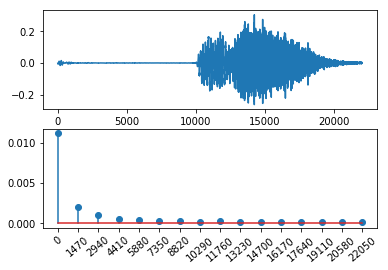

In [4]:
plt.subplot(211)
plt.plot(samples)

plt.subplot(212)
plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xticks(xf, rotation=40)
plt.show()